In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/HW3/train.csv')


In [ ]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [ ]:
data.isna().mean()

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

In [ ]:
data=data.replace(" ", np.nan)
data = data.replace('?', np.nan)
data = data.dropna()
data['TotalSpent']=pd.to_numeric(data['TotalSpent'])
data['TotalSpent']

0       1026.35
1       1872.20
2         75.90
3       2570.00
4       6758.45
         ...   
5277      82.15
5278    2188.45
5279      55.05
5280    2215.25
5281    1375.60
Name: TotalSpent, Length: 5273, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa78e4b9c90>,
      dtype=object)

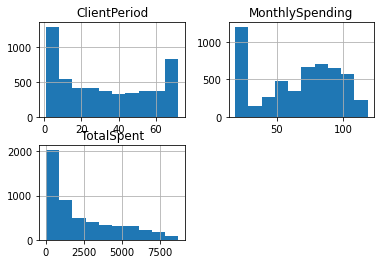

In [ ]:
import seaborn as sns
data.hist(column = num_cols)

In [ ]:
for column in cat_cols:
  print(f"{column} distribution:")
  print(data[column].value_counts())
  print()

Sex distribution:
Male      2651
Female    2622
Name: Sex, dtype: int64

IsSeniorCitizen distribution:
0    4431
1     842
Name: IsSeniorCitizen, dtype: int64

HasPartner distribution:
No     2704
Yes    2569
Name: HasPartner, dtype: int64

HasChild distribution:
No     3676
Yes    1597
Name: HasChild, dtype: int64

HasPhoneService distribution:
Yes    4754
No      519
Name: HasPhoneService, dtype: int64

HasMultiplePhoneNumbers distribution:
No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64

HasInternetService distribution:
Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64

HasOnlineSecurityService distribution:
No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64

HasOnlineBackup distribution:
No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBa

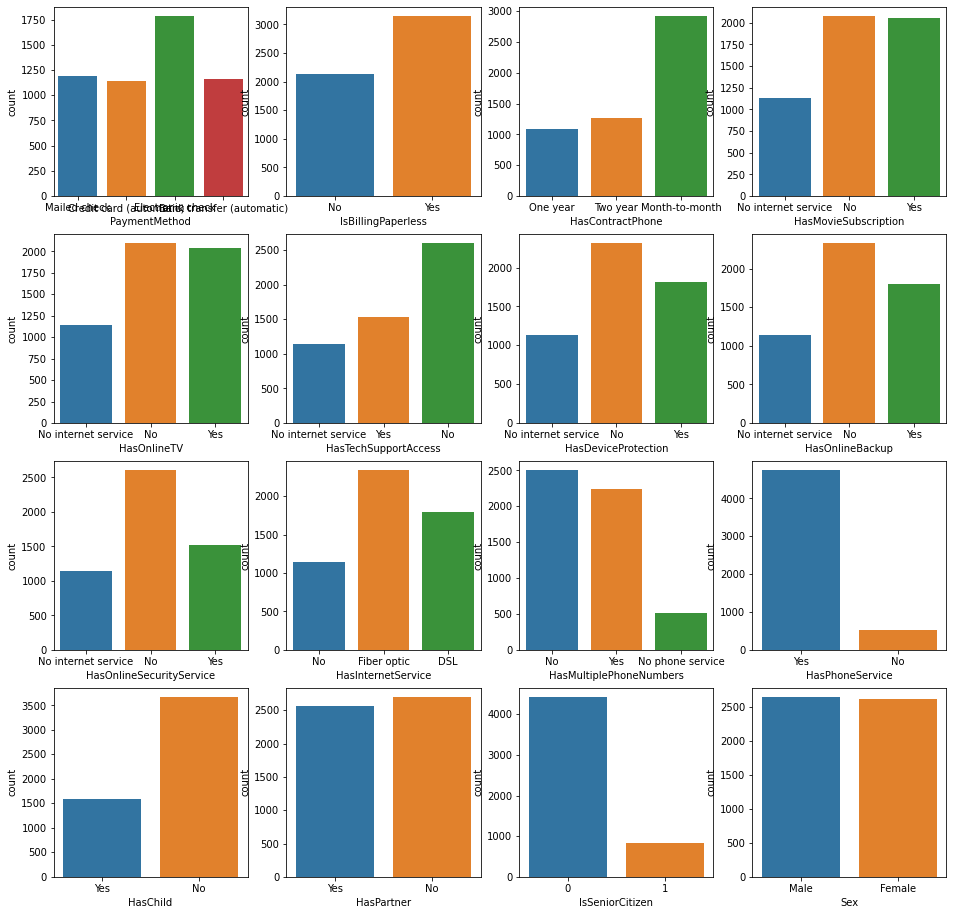

In [ ]:
fig, axarr = plt.subplots(4, 4, figsize=(16,16))
i = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
j = [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3]
for column in cat_cols:
  sns.countplot(x=data[column], data=data, ax=axarr[i.pop()][j.pop()])

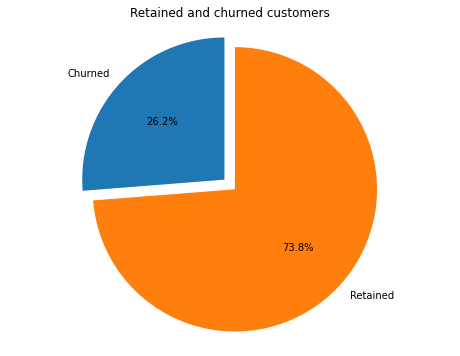

In [ ]:
labels = 'Churned', 'Retained'
sizes = [data.Churn[data['Churn']==1].count(), data.Churn[data['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.title("Retained and churned customers")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
X = data.drop(target_col, axis=1).copy()
X = X.fillna(np.mean(X))
y = data[target_col]

In [ ]:
num_transform = make_pipeline(SimpleImputer(), RobustScaler())
cat_transform = make_pipeline(OneHotEncoder())

preprocessor = ColumnTransformer(
    transformers = [
                    ('num', num_transform, num_cols),
                    ('cat', cat_transform, cat_cols)
    ]
)

clf = make_pipeline(preprocessor, LogisticRegression(C = 100, max_iter=1000, intercept_scaling=1.0, penalty='l2', tol=0.0001))

optimizer = GridSearchCV(clf, param_grid = {'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001]}, cv = 5, refit=True, scoring='roc_auc')
optimizer.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('simpleimputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                         

In [ ]:
print(optimizer.best_params_)
print(optimizer.best_score_)

{'logisticregression__C': 100}
0.8448441343271671


In [ ]:
{'logisticregression__C': 100}
0.8448441343271671

0.8448441343271671

In [ ]:
!pip install catboost
import catboost as catboost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=100,
                                             cat_features=cat_cols)
# boosting_model.grid_search({'n_estimators': [50, 100, 120, 130, 140, 200],'l2_leaf_reg': np.linspace(0, 1, 20), 'depth':[1, 5, 10, 20, 50, 100]}, 
#                           X_train, 
#                           y_train)
boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]



Learning rate set to 0.157346
0:	learn: 0.6406793	total: 8ms	remaining: 792ms
1:	learn: 0.6000178	total: 13.8ms	remaining: 679ms
2:	learn: 0.5677527	total: 19.2ms	remaining: 621ms
3:	learn: 0.5422105	total: 25.5ms	remaining: 613ms
4:	learn: 0.5230888	total: 30.8ms	remaining: 586ms
5:	learn: 0.5071938	total: 37ms	remaining: 579ms
6:	learn: 0.4951055	total: 42.1ms	remaining: 559ms
7:	learn: 0.4814938	total: 47.4ms	remaining: 545ms
8:	learn: 0.4700201	total: 52.5ms	remaining: 531ms
9:	learn: 0.4607294	total: 58.1ms	remaining: 523ms
10:	learn: 0.4531994	total: 63.2ms	remaining: 512ms
11:	learn: 0.4461136	total: 68.5ms	remaining: 502ms
12:	learn: 0.4413628	total: 71ms	remaining: 475ms
13:	learn: 0.4366151	total: 73.6ms	remaining: 452ms
14:	learn: 0.4319057	total: 79.9ms	remaining: 453ms
15:	learn: 0.4274239	total: 85.6ms	remaining: 449ms
16:	learn: 0.4239771	total: 91.1ms	remaining: 445ms
17:	learn: 0.4220484	total: 93.2ms	remaining: 425ms
18:	learn: 0.4197172	total: 98.4ms	remaining: 419ms

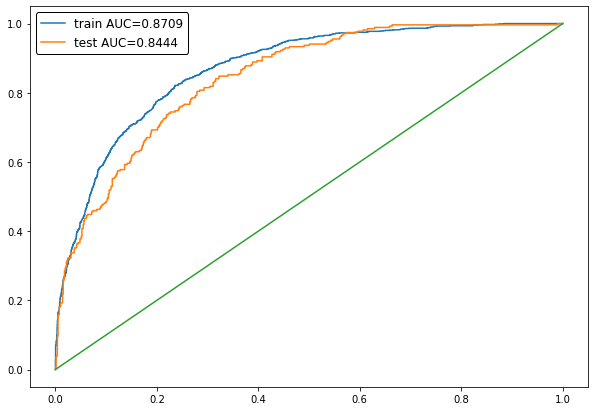

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()


In [ ]:
best_model = boosting_model


In [ ]:
X_test = pd.read_csv('/content/drive/My Drive/HW3/test.csv')
submission = pd.read_csv('/content/drive/My Drive/HW3/submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)[:, 1] #best_model.predict(X_test)
submission.to_csv('/my_submission7.csv',index=False)